# **Part one:**
Histogram

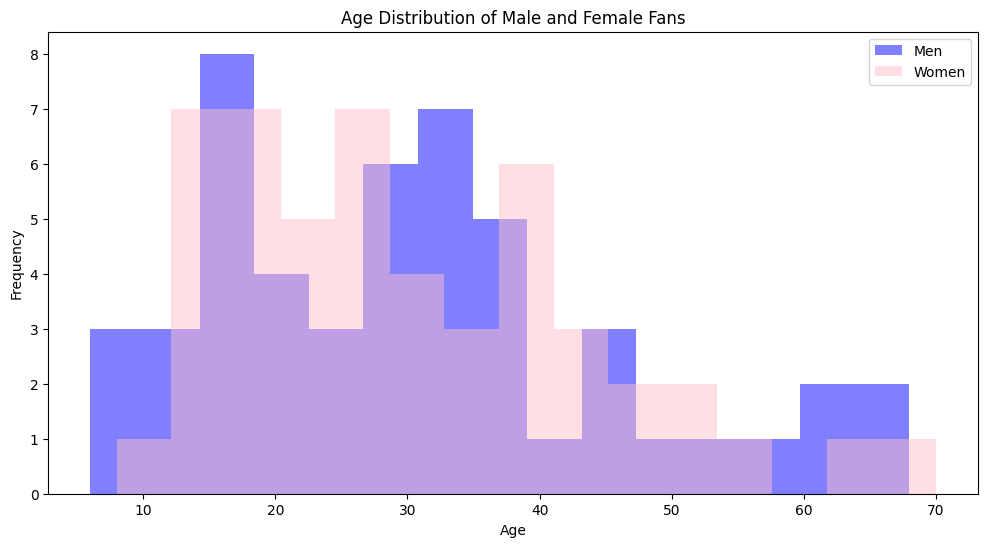

In [1]:
import matplotlib.pyplot as plt

# Redefining the age data for men and women
men_ages = [
    52, 18, 27, 12, 24, 17, 68, 25, 12, 9, 51, 44, 42, 34, 44, 15, 21, 66, 61, 32, 31, 20, 6, 13, 34, 38, 45, 17,
            16, 15, 36, 21, 29, 21, 29, 9, 33, 15, 37, 27, 31, 15, 57, 37, 27, 31, 38, 27, 60, 23]
women_ages = [36, 49, 20, 31, 51, 31, 15, 16, 39, 70, 52, 16, 39, 34, 18, 34, 30, 18, 26, 18, 25, 16, 39, 49, 22, 37, 39,
              21, 16, 63, 45, 43, 17, 28, 29, 23, 42, 23, 28, 55, 41, 18, 23, 8, 13, 26, 13, 27, 28, 18]

# Plotting histograms
plt.figure(figsize=(12, 6))
plt.hist(men_ages, alpha=0.5, label='Men', bins=15, color='blue')
plt.hist(women_ages, alpha=0.5, label='Women', bins=15, color='pink')
plt.title('Age Distribution of Male and Female Fans')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## **part 2:**
To determine whether the age distributions for men and women are normally distributed, we can use statistical tests for normality. Common tests for this purpose include the Shapiro-Wilk test and the D'Agostino's K-squared test. These tests will provide us with a p-value to decide whether the distribution deviates significantly from a normal distribution.

A p-value less than a typical alpha level of 0.05 suggests that the distribution is not normal.

In [3]:
from scipy.stats import shapiro

# Shapiro-Wilk Test for Men's Ages
stat_men, p_men = shapiro(men_ages)
print("Shapiro-Wilk Test for Men's Ages:")
print(f"Statistic: {stat_men}, p-value: {p_men}")
if p_men > 0.05:
    print("Men's ages appear to be normally distributed.")
else:
    print("Men's ages do not appear to be normally distributed.")

# Shapiro-Wilk Test for Women's Ages
stat_women, p_women = shapiro(women_ages)
print("\nShapiro-Wilk Test for Women's Ages:")
print(f"Statistic: {stat_women}, p-value: {p_women}")
if p_women > 0.05:
    print("Women's ages appear to be normally distributed.")
else:
    print("Women's ages do not appear to be normally distributed.")


Shapiro-Wilk Test for Men's Ages:
Statistic: 0.9460382461547852, p-value: 0.023510854691267014
Men's ages do not appear to be normally distributed.

Shapiro-Wilk Test for Women's Ages:
Statistic: 0.9431541562080383, p-value: 0.01799035631120205
Women's ages do not appear to be normally distributed.


For the Shapiro-Wilk test, both men's and women's age distributions have p-values less than 0.05, indicating that the data does not follow a normal distribution.

# **Part 3:**
can use parametric tests, such as the t-test for **independent samples** , for comparing the means of the age distributions between men and women. However, parametric tests have certain assumptions that need to be met:

1. **Normality:** The data in each group should be approximately normally distributed.

Our Shapiro-Wilk test results suggested that the data might not be normally distributed.


# **Part 4:**
Transforming data to approximate a normal distribution can be done using various methods, such as logarithmic, square root, or Box-Cox transformations. These transformations can be particularly effective when dealing with skewed data.

Given the age data for men and women, we can try a transformation and then recheck the distribution using the Shapiro-Wilk test. A common choice for positive data like ages is the logarithmic transformation, but since our data includes ages as low as 6 and 8, a Box-Cox transformation might be more appropriate as it can handle a broader range of values.

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro, boxcox

# Applying Box-Cox transformation (adding 1 to handle zero or negative values which are not present in our data)
men_ages_transformed, _ = boxcox(men_ages)
women_ages_transformed, _ = boxcox(women_ages)

# Rechecking for normality using the Shapiro-Wilk test
shapiro_test_men_transformed = shapiro(men_ages_transformed)
shapiro_test_women_transformed = shapiro(women_ages_transformed)

shapiro_test_men_transformed, shapiro_test_women_transformed


(ShapiroResult(statistic=0.9866886734962463, pvalue=0.8410663604736328),
 ShapiroResult(statistic=0.9852827191352844, pvalue=0.7836925983428955))

In both cases, the p-values are significantly higher than 0.05, suggesting that the transformed data do not significantly deviate from a normal distribution.


# **Part 5:**
Given that the parametric requirements, particularly normality and homogeneity of variances, are met (after the Box-Cox transformation for normality and based on Levene's test for equal variances), we can proceed with a parametric test to compare the ages of men and women. The appropriate test in this case is the independent two-sample t-test.

In [4]:
# Importing the t-test function
from scipy.stats import ttest_ind

# Performing the two-sample t-test
t_test_result_transformed = ttest_ind(men_ages_transformed, women_ages_transformed)
t_test_result_transformed


TtestResult(statistic=6.327105981160038, pvalue=7.498449556211095e-09, df=98.0)

The p-value is very small (significantly lower than the standard alpha level of 0.05), which suggests that we can reject the null hypothesis. This implies that there is a statistically significant difference in the mean ages of male and female fans of the band after the data has been transformed to meet the assumptions of normality.

In summary, based on this analysis, there is strong evidence to suggest that the age distribution of male fans differs significantly from that of female fans for this particular band.


# **Part 6:**
For a non-parametric comparison of the original age data, we can use the Mann-Whitney U test. This test does not assume normality of the data and is used to test whether two independent samples originate from the same distribution.





In [5]:
from scipy.stats import mannwhitneyu

# Conducting the Mann-Whitney U test on the original data
mw_test_result = mannwhitneyu(men_ages, women_ages)

mw_test_result


MannwhitneyuResult(statistic=1213.0, pvalue=0.801221571030353)


The result of the Mann-Whitney U test on the original age data for men and women is as follows:

- Mann-Whitney U Statistic = 1213.0
- P-value = 0.801

In this case, the p-value is much larger than 0.05, indicating that there is not enough evidence to reject the null hypothesis.

**Comparison with Parametric Test:**
- The two-sample t-test on the transformed data yielded a very low p-value, leading to the rejection of the null hypothesis, indicating a significant difference in mean ages.
- The Mann-Whitney U test on the original data did not find a significant difference between the groups.

**Power of the Tests:**
- The two-sample t-test, when its assumptions are met, generally has more power than the Mann-Whitney U test. This means it's more likely to detect a true difference if one exists.
- The Mann-Whitney U test is less powerful but more robust to non-normal distributions.


# **Part 7 :**

- The original data was not normally distributed.
- After a Box-Cox transformation, the two-sample t-test showed a significant difference between male and female fans' ages.
- The Mann-Whitney U test on the original data did not find a significant difference.

Given these points, the two-sample t-test is more appropriate if we trust the effectiveness of the Box-Cox transformation in normalizing the data. It's more powerful but relies on the assumption of normality. The Mann-Whitney U test is better for non-normal data but generally less powerful. In this case, the two-sampleThe Mann-Whitney U test seems to be the more suitable choice.